# **성능관리-일반화성능,미리멈춤**

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### **(2) 데이터로딩**

* 데이터 로딩
    * 과적합을 위한 예제 데이터입니다.
    * target
    * feature : 0 ~ 299

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/overfit_sample.csv"
data = pd.read_csv(path)
data.head()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,1,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [ ]:
data.shape

(250, 301)

## **2. Early Stopping**

### **(1) 데이터 준비**

In [ ]:
# 데이터분할 : x, y
target = 'target'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

# 데이터분할 : train, validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

In [ ]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### **(2) 모델링**

In [ ]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

# 메모리 정리
clear_session()

# Sequential 타입
model1 = Sequential( [Input(shape = (nfeatures,)),
                      Dense(128, activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model1.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

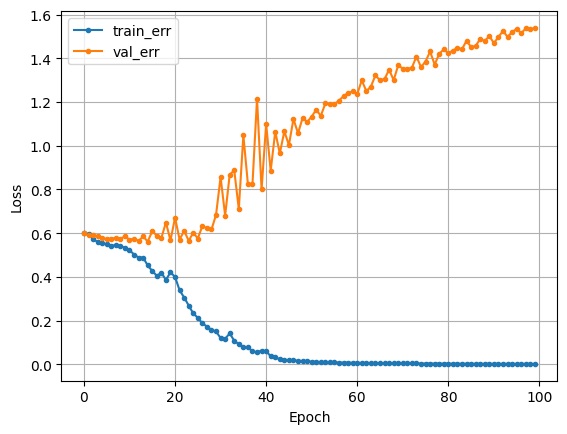

In [ ]:
# 학습
hist = model1.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

### **(3) 미리 멈춤!(Early Stopping)**

#### **1) 함수 불러오기**

In [ ]:
from keras.callbacks import EarlyStopping

#### **2) 모델링 with early stopping**

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.5870 - val_loss: 0.5992
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5659 - val_loss: 0.5843
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5612 - val_loss: 0.5837
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5767 - val_loss: 0.5828
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5401 - val_loss: 0.5800
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5621 - val_loss: 0.5769
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5259 - val_loss: 0.5816
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4999 - val_loss: 0.5753
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4784 - val_loss: 0.5771
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5343 - val_loss: 0.5789
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5185 - val_loss: 0.5839
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5198 - val_lo

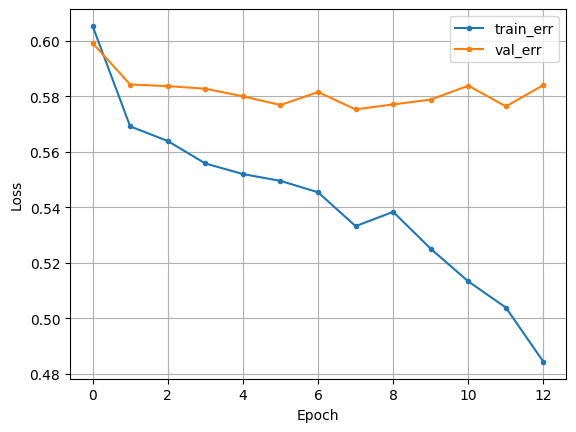

In [ ]:
# 모델 선언
clear_session()

model2 = Sequential( [Input(shape = (nfeatures,)),
                      Dense(128, activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )
model2.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

# EarlyStopping 설정 ------------
min_de = 0.001
pat = 5

es = EarlyStopping(monitor = 'val_loss', min_delta = min_de, patience = pat)
# --------------------------------

# 학습
hist = model2.fit(x_train, y_train, epochs = 100, validation_split=0.2,
                  callbacks = [es]).history
dl_history_plot(hist)

## 3.모델 저장하기

### (1) 모델 저장하기

* model.save(‘파일이름.keras’)
    * 딥러닝 모델의 메소드로 .save가 제공됩니다.
    * 파일이름.keras 파일이 저장됩니다.

In [ ]:
model1.save('hanky.keras')

* 저장된 파일은 왼쪽 '파일'탭에서 확인 가능
* 파일을 다운로드 받을 수 있다.

### (2) 모델 로딩하기

* load_model 함수는 별도로 불러와야 합니다.
* 경로를 맞춰주고 h5 파일을 읽어오면 그대로 사용 가능합니다.

In [ ]:
from keras.models import load_model
model2 = load_model('hanky.keras')

* 불러온 모델 사용하기

In [ ]:
pred2 = model2.predict(x_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [ ]:
pred2

array([[5.19121357e-04],
       [1.95668787e-01],
       [9.25659657e-01],
       [2.83312332e-03],
       [7.40198811e-05],
       [8.33270490e-01],
       [1.40219484e-03],
       [1.92835840e-04],
       [2.32820772e-03],
       [8.64624619e-01],
       [1.78036373e-03],
       [3.85308289e-04],
       [5.09003148e-05],
       [3.50247510e-02],
       [4.99100024e-05],
       [1.96773862e-03],
       [1.11050409e-04],
       [2.66645860e-04],
       [8.19446432e-05],
       [1.62834363e-06],
       [5.67416474e-02],
       [2.82456696e-01],
       [1.11457445e-02],
       [1.05272897e-01],
       [3.16604483e-03],
       [7.19294772e-02],
       [1.51357101e-03],
       [7.50684857e-01],
       [2.21798364e-05],
       [2.80293025e-04],
       [8.10707688e-01],
       [5.86688146e-03],
       [1.19093887e-03],
       [2.44127810e-02],
       [9.73418588e-04],
       [2.74783326e-03],
       [1.30308894e-04],
       [8.27771146e-03],
       [1.93926494e-03],
       [3.33282202e-01],


In [ ]:
pred2_1 = np.where(pred2> .5, 1, 0)

In [ ]:
print(accuracy_score(y_val,pred2_1))
print('-'*60)
print(confusion_matrix(y_val, pred2_1))
print('-'*60)
print(classification_report(y_val, pred2_1))

0.62
------------------------------------------------------------
[[30  5]
 [14  1]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        35
           1       0.17      0.07      0.10        15

    accuracy                           0.62        50
   macro avg       0.42      0.46      0.43        50
weighted avg       0.53      0.62      0.56        50



### (3) 중간 체크포인트에 모델 저장하기

* 폴더 정리 : 위에서 저장한 파일들 제거하기

In [ ]:
import os

def delete_model_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".keras"):
            file_path = os.path.join(directory, filename)
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# 삭제할 디렉토리 지정
directory_to_delete_from = "/content/"

# 확장자가 .h5인 파일 삭제
delete_model_files(directory_to_delete_from)


Deleted: /content/hanky.keras


#### **1) 체크포인트 함수 불러오기**

In [ ]:
from keras.callbacks import ModelCheckpoint

#### **2) 모델링 체크포인트 저장**

* 모델 선언

In [ ]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

# 메모리 정리
clear_session()

# Sequential 타입
model1 = Sequential( [Input(shape = (nfeatures,)),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(16, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model1.compile(optimizer= Adam(learning_rate = 0.0001), loss='binary_crossentropy')

* 체크포인트 저장
    * 아래 코드에서 ModelCheckpoint 콜백은 검증 데이터의 정확도(val_accuracy)를 기준으로 모델 저장
    * 모델의 성능이 이전에 저장된 모델보다 향상될 때만 저장되도록 save_best_only=True로 설정
    * 또한, verbose=1로 설정하면 모델이 저장될 때마다 콘솔에 메시지가 표시됨.

In [ ]:
cp_path = '/content/{epoch:03d}.keras'  # Keras 2.11 이상 버전에서 모델 확장자 .keras
mcp = ModelCheckpoint(cp_path, monitor='val_loss', verbose = 1, save_best_only=True)

# 학습
hist = model1.fit(x_train, y_train, epochs = 50, validation_split=.2, callbacks=[mcp]).history

Epoch 1/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.8539
Epoch 1: val_loss improved from inf to 0.74825, saving model to /content/001.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.8115 - val_loss: 0.7482
Epoch 2/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.7404
Epoch 2: val_loss improved from 0.74825 to 0.69438, saving model to /content/002.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.7403 - val_loss: 0.6944
Epoch 3/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7030
Epoch 3: val_loss improved from 0.69438 to 0.65640, saving model to /content/003.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6925 - val_loss: 0.6564
Epoch 4/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6764
Epoch 4: val_loss improved from 0.65640 to 0.63458, saving model to /content/004.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6614 - val_loss: 0.6346
Epoch 5/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6283
Epoch 5: val_loss improved from 0.63458 to 0.62140

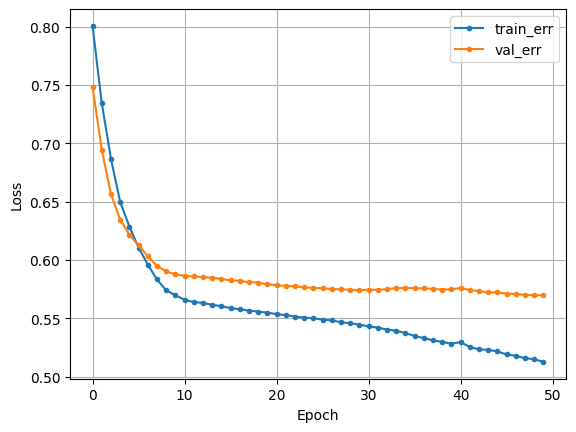

In [ ]:
# 학습결과 그래프
dl_history_plot(hist)

#### **3) 최종 best 모델만 저장**

In [ ]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

# 메모리 정리
clear_session()

# Sequential 타입
model1 = Sequential( [Input(shape = (nfeatures,)),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(16, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model1.compile(optimizer= Adam(learning_rate = 0.0001), loss='binary_crossentropy')

In [ ]:
cp_path = '/content/best_model.keras'
mcp = ModelCheckpoint(cp_path, monitor='val_loss', verbose = 1, save_best_only=True)

# 학습
hist = model1.fit(x_train, y_train, epochs = 50, validation_split=.2, callbacks=[mcp]).history

Epoch 1/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.7710
Epoch 1: val_loss improved from inf to 0.74146, saving model to /content/best_model.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.7668 - val_loss: 0.7415
Epoch 2/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.7526
Epoch 2: val_loss improved from 0.74146 to 0.71136, saving model to /content/best_model.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.7365 - val_loss: 0.7114
Epoch 3/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7212
Epoch 3: val_loss improved from 0.71136 to 0.68766, saving model to /content/best_model.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7084 - val_loss: 0.6877
Epoch 4/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6786
Epoch 4: val_loss improved from 0.68766 to 0.66832, saving model to /content/best_model.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6781 - val_loss: 0.6683
Epoch 5/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6799
Epoch 5: val_loss impr

## **4. 복습문제**
* 미리 멈춤과 베스트 모델 저장을 한번에 수행해 봅시다.


In [ ]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

# 메모리 정리
clear_session()

# Sequential 타입
model3 = Sequential( [Input(shape = (nfeatures,)),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(16, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model3.compile(optimizer= Adam(learning_rate = 0.0001), loss='binary_crossentropy')

In [ ]:
# 미리멈춤, 베스트 모델 저장 설정
cp_path = '/content/best_model.keras'
mcp = ModelCheckpoint(cp_path, monitor = 'val_loss', verbose = 1, save_best_only = True)

min_de = 0.001
pat = 5
es = EarlyStopping(monitor = 'val_loss', min_delta = min_de, patience = pat)

# 학습
hist = model1.fit(x_train, y_train, epochs = 50, validation_split=.2, callbacks=[mcp]).history
hist2 = model1.fit(x_train, y_train, epochs = 50, validation_split=.2, callbacks=[es]).history


Epoch 1/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 0.5870
Epoch 1: val_loss improved from inf to 0.59466, saving model to /content/best_model.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5587 - val_loss: 0.5947
Epoch 2/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6138
Epoch 2: val_loss did not improve from 0.59466
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5537 - val_loss: 0.5955
Epoch 3/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6727
Epoch 3: val_loss did not improve from 0.59466
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5577 - val_loss: 0.5954
Epoch 4/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5842
Epoch 4: val_loss did not improve from 0.59466
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5368 - val_loss: 0.5958
Epoch 5/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4341
Epoch 5: val_loss did not improve from 0.59466
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5020 - val_loss: 0.5959
Epoch 6/50
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27

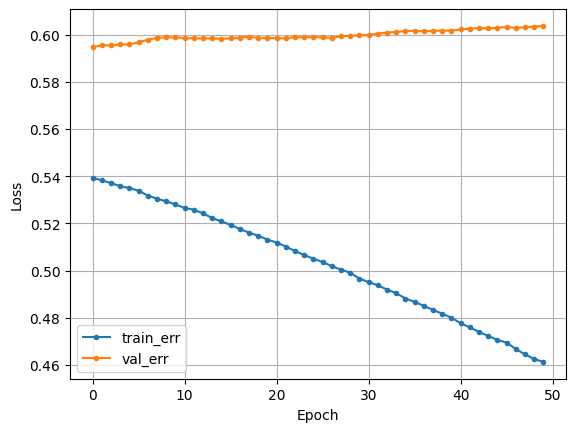

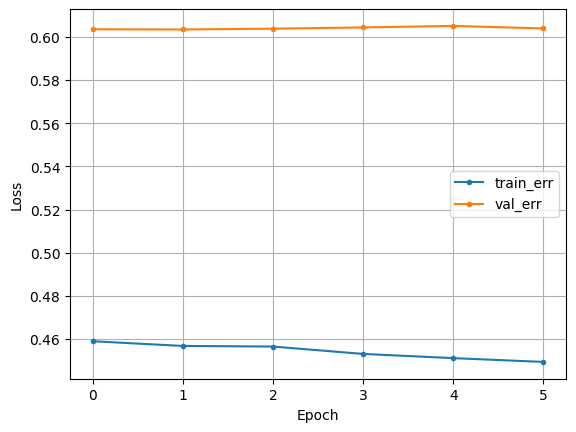

In [ ]:
dl_history_plot(hist)
dl_history_plot(hist2)